In [28]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [29]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 186s 3ms/step - loss: 0.2911 - accuracy: 0.9123 - val_loss: 0.0604 - val_accuracy: 0.9802

Epoch 00001: val_loss improved from inf to 0.06037, saving model to ./model_CONV2D_/01-0.0604.hdf5
Epoch 2/30
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0918 - accuracy: 0.9732 - val_loss: 0.0424 - val_accuracy: 0.9851

Epoch 00002: val_loss improved from 0.06037 to 0.04242, saving model to ./model_CONV2D_/02-0.0424.hdf5
Epoch 3/30
60000/60000 [==============================] - 218s 4ms/step - loss: 0.0673 - accuracy: 0.9803 - val_loss: 0.0324 - val_accuracy: 0.9898

Epoch 00003: val_loss improved from 0.04242 to 0.03241, saving model to ./model_CONV2D_/03-0.0324.hdf5
Epoch 4/30
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0548 - accuracy: 0.9828 - val_loss: 0.0318 - val_accuracy: 0.9896

Epoch 00004: val_loss improved from 0.03241 to 0.

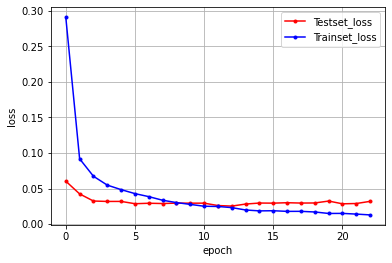

In [11]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

MODEL_DIR = './model_CONV2D_/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = './model_CONV2D_/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', save_best_only=True, verbose=1)
earlystopping=EarlyStopping(monitor = 'val_loss', verbose = 1, patience = 10)


model = Sequential()
model.add(Conv2D(32, input_shape = (28,28,1), kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=30, batch_size=200, callbacks=[checkpointer, earlystopping],verbose=1,validation_data=(x_test,y_test))

print("\n Test Accuracy : %.4f"%(model.evaluate(x_test,y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker = '.',c='blue',label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
          
